In [1]:
import importlib
import matplotlib.pyplot as plt
import benchmark_module
importlib.reload(benchmark_module)

<module 'benchmark_module' from '/Users/kevinliu/Desktop/cs2241/search-forests/benchmark_module.cpython-312-darwin.so'>

In [2]:
from benchmark_module import benchmark, generate_zipf_queries, RandomEngine

In [3]:
NUM_KEYS = 100_000
NUM_QUERIES = 100_000
ZIPF_ALPHA = 2.0
gen = RandomEngine(seed=42)

In [4]:
def plot_res(li, structures, query_stats, insert_stats, x_label):
    w = 0.12
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))

    x = range(len(li))
    for i, s in enumerate(structures):
        y = [insert_stats[a][s] for a in li]
        ax1.bar([xi + i * w for xi in x], y, width=w, label=s)
    ax1.set_xticks([xi + (len(structures) - 1) * w / 2 for xi in x])
    ax1.set_xticklabels(li)
    ax1.set_xlabel(x_label)
    ax1.set_ylabel("Avg number of comparisons (insert)")
    ax1.legend(loc="upper left")

    x2 = range(len(li))
    for i, s in enumerate(structures):
        y2 = [query_stats[a][s] for a in li]
        ax2.bar([xi + i * w for xi in x], y2, width=w, label=s)
    ax2.set_xticks([xi + (len(structures) - 1) * w / 2 for xi in x2])
    ax2.set_xticklabels(li)
    ax2.set_xlabel(x_label)
    ax2.set_ylabel("Avg number of comparisons (query)")
    ax2.legend(loc="upper left")

    plt.tight_layout()
    plt.show()

In [7]:
def run_key_experiments(keys, query=NUM_QUERIES, alpha=ZIPF_ALPHA, gen=gen):
    query_stats = {}
    insert_stats = {}

    for key in keys:
        queries = generate_zipf_queries(key, query, alpha, gen)
        out = benchmark(queries, key, gen)
        query_stats[key] = out["queries"]
        insert_stats[key] = out["inserts"]

    structures = list(query_stats[keys[0]].keys())
    print("*" * 40)
    print(query_stats)
    print(insert_stats)
    print("*" * 40)

    plot_res(keys, structures, query_stats, insert_stats, "Number of keys")



================== INSERTS ==================
Total: 1000
Comparisons: 
  red-black tree:     28.96
  f-forest:           23.22
  learned f-forest:   21.17
  r-forest:           23.22
  learned r-forest:   15.38
  robust-sl:          11.55
  learned treap:      7.31

================== QUERIES ==================
Total: 1000
Comparisons: 
  red-black tree:     11.42
  f-forest:           16.88
  learned f-forest:   9.48
  r-forest:           44.28
  learned r-forest:   17.11
  robust-sl:          32.90
  learned treap:      17.26

================== INSERTS ==================
Total: 5000
Comparisons: 
  red-black tree:     38.29
  f-forest:           31.85
  learned f-forest:   22.09
  r-forest:           31.85
  learned r-forest:   17.86
  robust-sl:          13.57
  learned treap:      8.37

================== QUERIES ==================
Total: 5000
Comparisons: 
  red-black tree:     13.89
  f-forest:           33.82
  learned f-forest:   9.65
  r-forest:           94.91
  learned r-

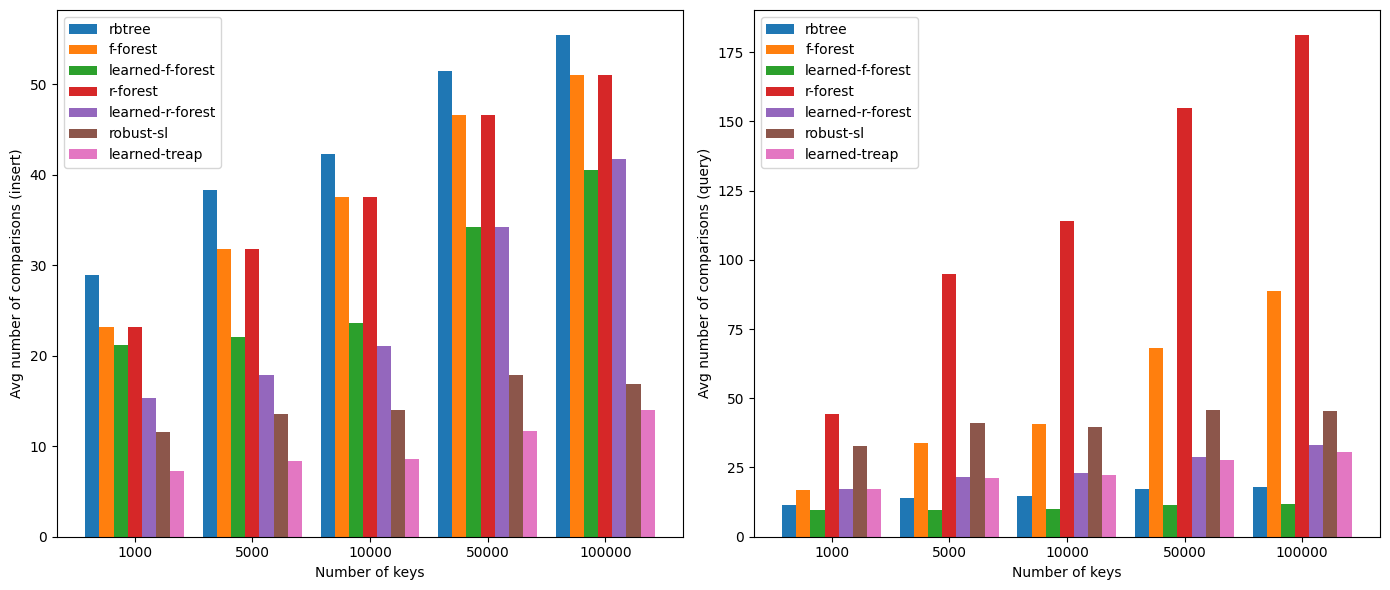

In [8]:
keys = [1_000, 5_000, 10_000, 50_000, 100_000]
run_key_experiments(keys)

In [14]:
def run_alpha_experiments(alphas, key=NUM_KEYS, query=NUM_QUERIES, gen=gen):
    query_stats = {}
    insert_stats = {}

    for alpha in alphas:
        queries = generate_zipf_queries(key, query, alpha, gen)
        out = benchmark(queries, key, gen)
        query_stats[alpha] = out["queries"]
        insert_stats[alpha] = out["inserts"]

    structures = list(query_stats[alphas[0]].keys())
    print("*" * 40)
    print(query_stats)
    print(insert_stats)
    print("*" * 40)

    plot_res(alphas, structures, query_stats, insert_stats, "Zipf Alpha")



================== INSERTS ==================
Total: 100000
Comparisons: 
  red-black tree:     55.45
  f-forest:           51.01
  learned f-forest:   40.58
  r-forest:           51.01
  learned r-forest:   41.10
  robust-sl:          17.95
  learned treap:      27.20

================== QUERIES ==================
Total: 100000
Comparisons: 
  red-black tree:     18.10
  f-forest:           95.27
  learned f-forest:   12.68
  r-forest:           190.03
  learned r-forest:   34.39
  robust-sl:          46.96
  learned treap:      55.62

================== INSERTS ==================
Total: 100000
Comparisons: 
  red-black tree:     55.45
  f-forest:           51.01
  learned f-forest:   40.58
  r-forest:           51.01
  learned r-forest:   40.86
  robust-sl:          20.40
  learned treap:      22.61

================== QUERIES ==================
Total: 100000
Comparisons: 
  red-black tree:     18.09
  f-forest:           94.86
  learned f-forest:   12.62
  r-forest:           190.1

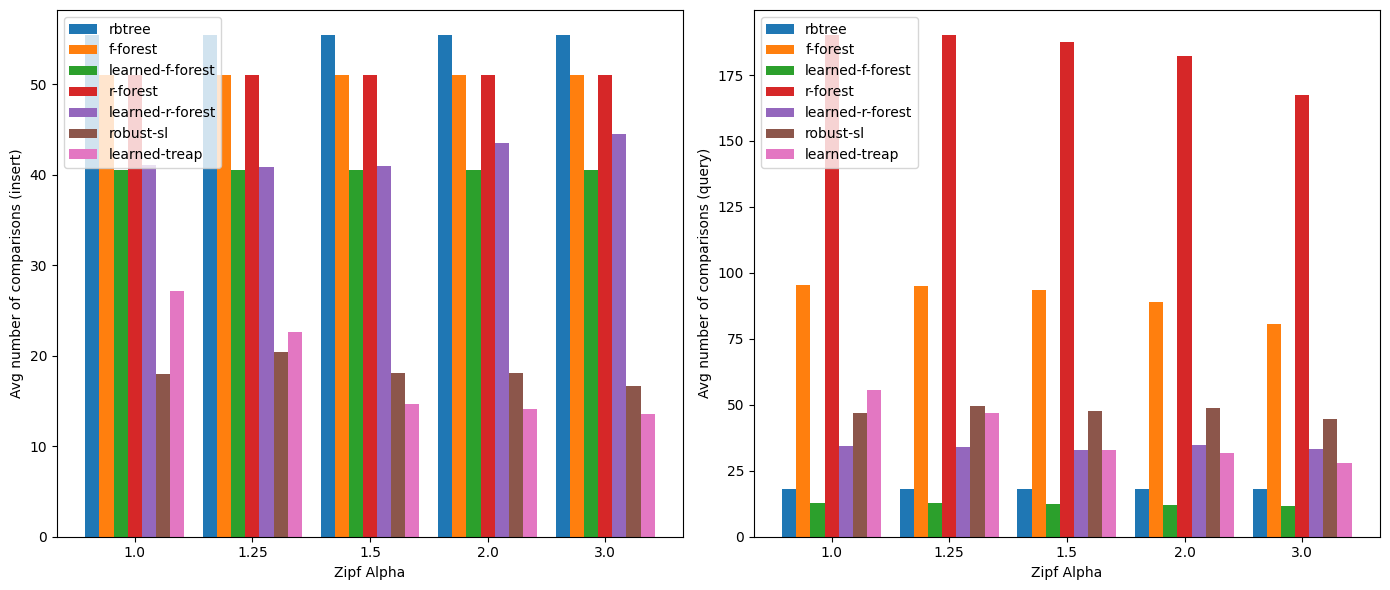

In [15]:
alphas = [1., 1.25, 1.5, 2., 3.]
run_alpha_experiments(alphas)